# PM avec containtes
Ce notebook présente quelques résultats sur la simulation de système contraints avec RPM.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image


import rpm_solver as solver
import models
%matplotlib widget

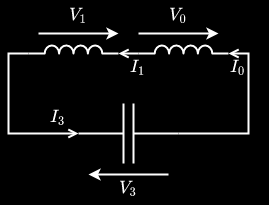

In [2]:
Image("LLC_system.png")

### Linear case


In [3]:
# Parameter definition
L0 = 0.5
L1 = 0.2
C0 = 1

# period
T0 = 2*np.pi*np.sqrt((L0+L1)*C0)
f0 = 1/T0
print(f"T0 = {T0}s")

#Simulation duration 
duration = 20

T0 = 5.256889985823387s


In [4]:

model = models.LinearLLC(L0, L1, C0)
p_order = 2
k_order = p_order

sr = 1
timestep = 1/sr
rpmsolver = solver.RPMSolverPHS(model, p_order, k_order, timestep)

In [5]:

init = np.array([0, 0, 1])
xframes, dx_proj = rpmsolver.simulate(init, duration)[:2]

Mean number of NR iterations : 1.0
Max number of NR iterations : 1.0,              step index : 0


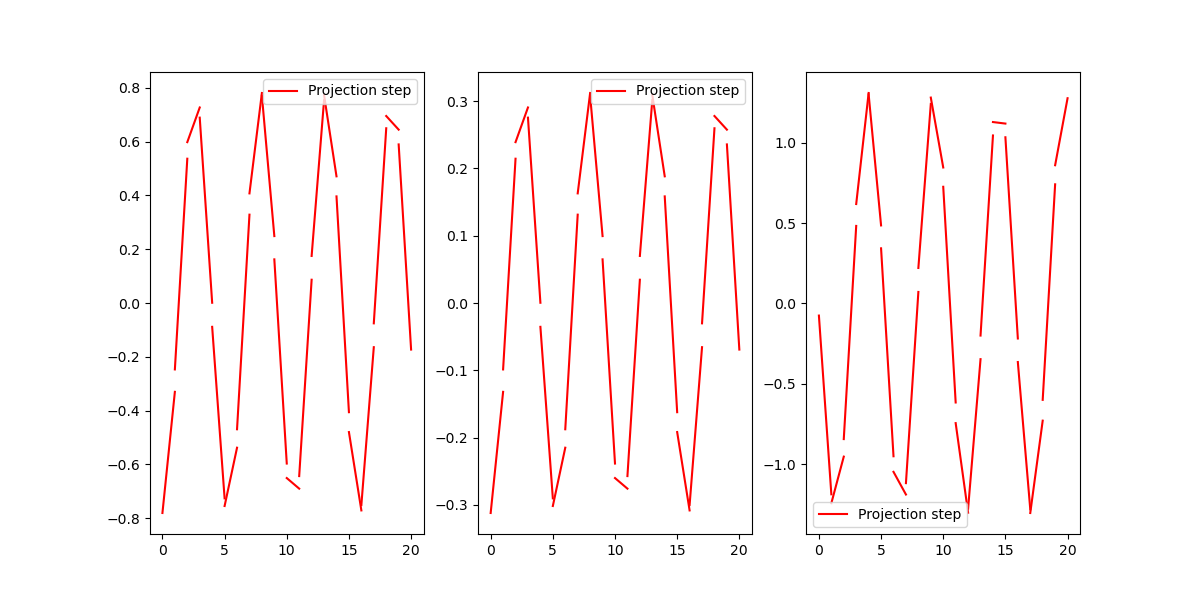

In [6]:
solver.hp.plot_flows_trajectories(rpmsolver, dx_proj)

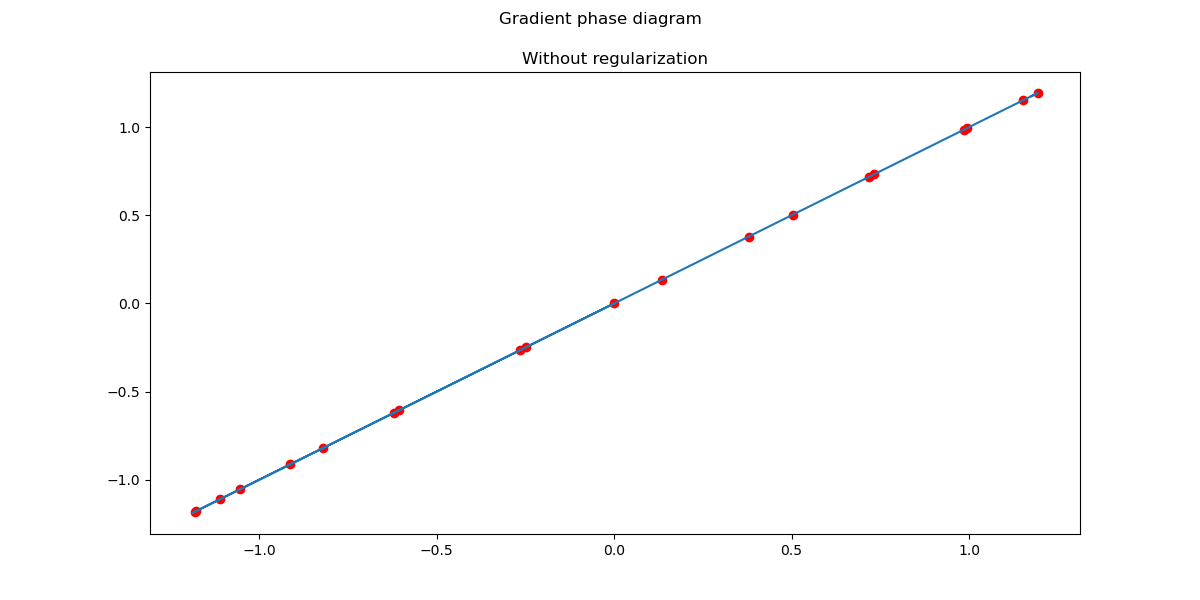

In [7]:
fig = solver.hp.plot_gradients_phase_proj(rpmsolver, xframes, dx_proj, N_points=10)

### Non linear case

In [8]:
# Parameter definition
L0 = 1
phi0 = 0.5
E0 = phi0**2 / L0


L1 = L0
phi1 = 1
E1 = E0


C0 = 1

# period
T0 = 2*np.pi*np.sqrt((L0+L1)*C0)
f0 = 1/T0
print(f"T0 = {T0}s")

#Simulation duration 
duration = 25

T0 = 8.885765876316732s


In [16]:
model = models.NonLinearLLC1(E0, phi0, E1, phi1, C0)
p_order = 1
k_order = p_order

sr = 1
timestep = 1/sr
rpmsolver = solver.RPMSolverPHS(model, p_order, k_order, timestep, max_iter=1000)

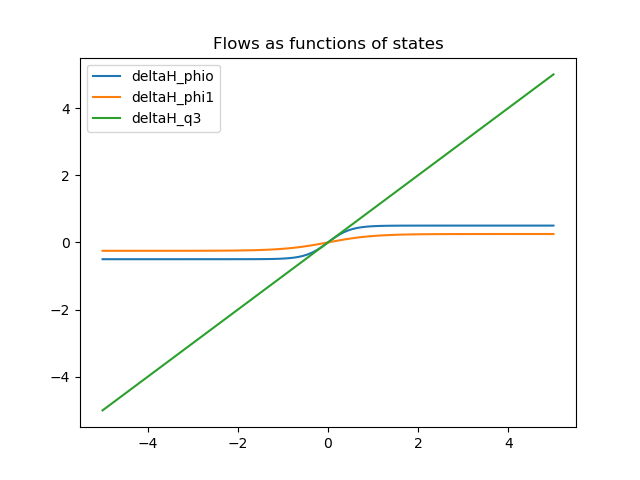

In [17]:
solver.hp.plot_gradients(rpmsolver, np.linspace(-5, 5, 100), labels=(["deltaH_phio","deltaH_phi1","deltaH_q3"]))

In [18]:
init = np.array([0, 0, 1])
xframes, dx_proj = rpmsolver.simulate(init, duration)[:2]

Mean number of NR iterations : 38.48
Max number of NR iterations : 44.0,              step index : 2


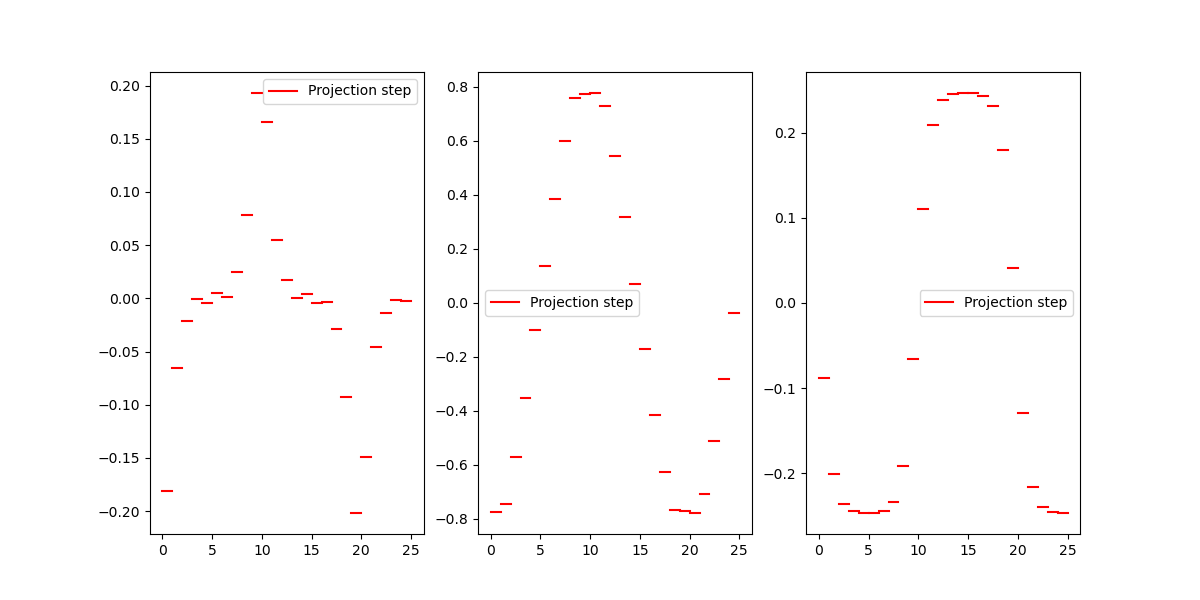

In [19]:
solver.hp.plot_flows_trajectories(rpmsolver, dx_proj)

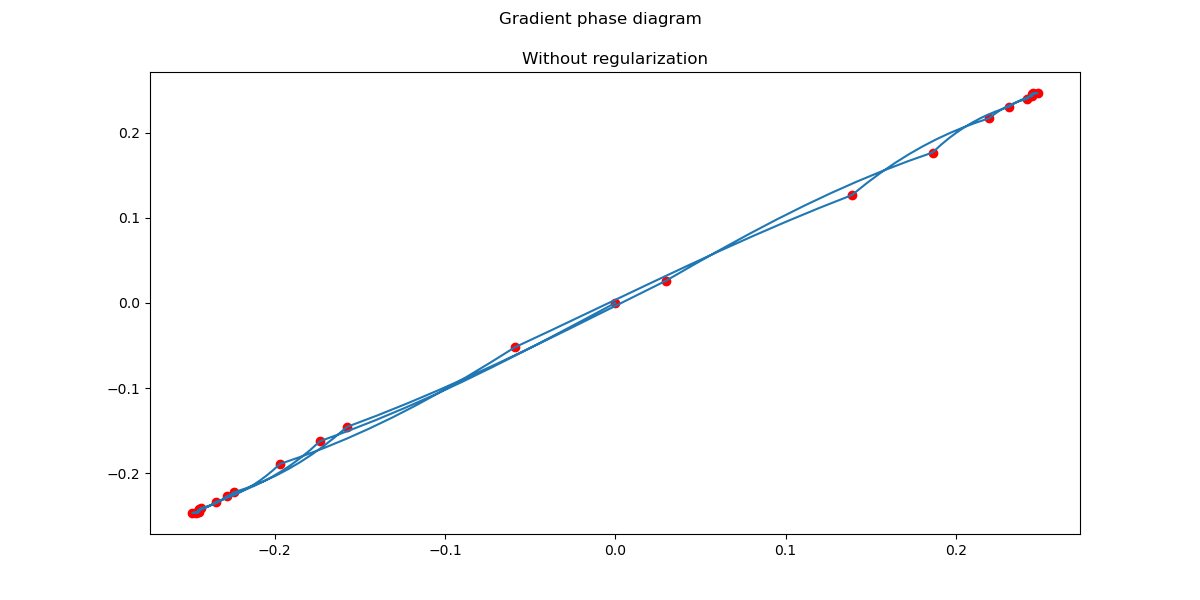

In [20]:
fig = solver.hp.plot_gradients_phase_proj(rpmsolver, xframes, dx_proj, N_points=10)


In [21]:
# Error on the constraint equation at the sampling points
efforts = model.grad_H(xframes)
error_constraints = np.abs((efforts[:, 0] -  efforts [:, 1]) / efforts[:, 0] *100)

/tmp/ipykernel_10496/2574197018.py:3: RuntimeWarning: invalid value encountered in true_divide
  error_constraints = np.abs((efforts[:, 0] -  efforts [:, 1]) / efforts[:, 0] *100)


Text(0, 0.5, 'Relative error (%)')

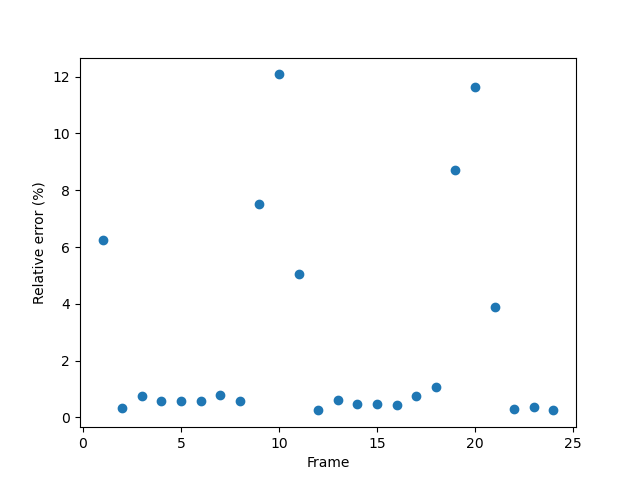

In [22]:
plt.figure()
plt.scatter(np.arange(len(error_constraints)),error_constraints)
plt.xlabel('Frame')
plt.ylabel('Relative error (%)')

Comparaison convergence Newton-Raphson : traitement par composant équivalent ou par contrainte.

In [47]:
# Parameter definition
L0 = 1
phi0 = 0.5
E0 = phi0**2 / L0


L1 = L0
phi1 = 1
E1 = E0


C0 = 1

# period
T0 = 2*np.pi*np.sqrt((L0+L1)*C0)
f0 = 1/T0
print(f"T0 = {T0}s")

#Simulation duration 
duration = 25

T0 = 8.885765876316732s


## Non-linear + linear mix

In [48]:
# Parameter definition
L0 = 1
phi0 = 0.5
E0 = phi0**2 / L0

L1 = L0
phi1 = 0.3
E1 = E0

C0 = 1

# period
T0 = 2*np.pi*np.sqrt((L0+L1)*C0)
f0 = 1/T0
print(f"T0 = {T0}s")

#Simulation duration 
duration = 50

T0 = 8.885765876316732s


In [49]:
model = models.NonLinearLLC2(L0, E1, phi1, C0)
p_order = 1
k_order = p_order

sr = 5
timestep = 1/sr
rpmsolver = solver.RPMSolverPHS(model, p_order, k_order, timestep, max_iter=1000)

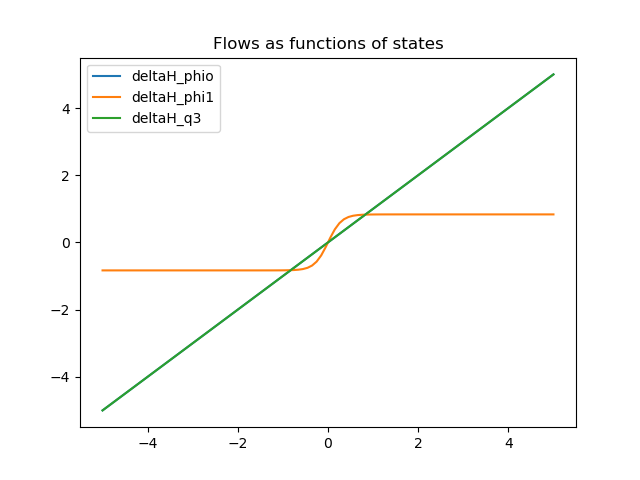

In [50]:
solver.hp.plot_gradients(rpmsolver, np.linspace(-5, 5, 100), labels=(["deltaH_phio","deltaH_phi1","deltaH_q3"]))

In [51]:
init = np.array([0, 0, 1])
xframes, dx_proj = rpmsolver.simulate(init, duration)[:2]

Mean number of NR iterations : 31.424
Max number of NR iterations : 141.0,              step index : 76


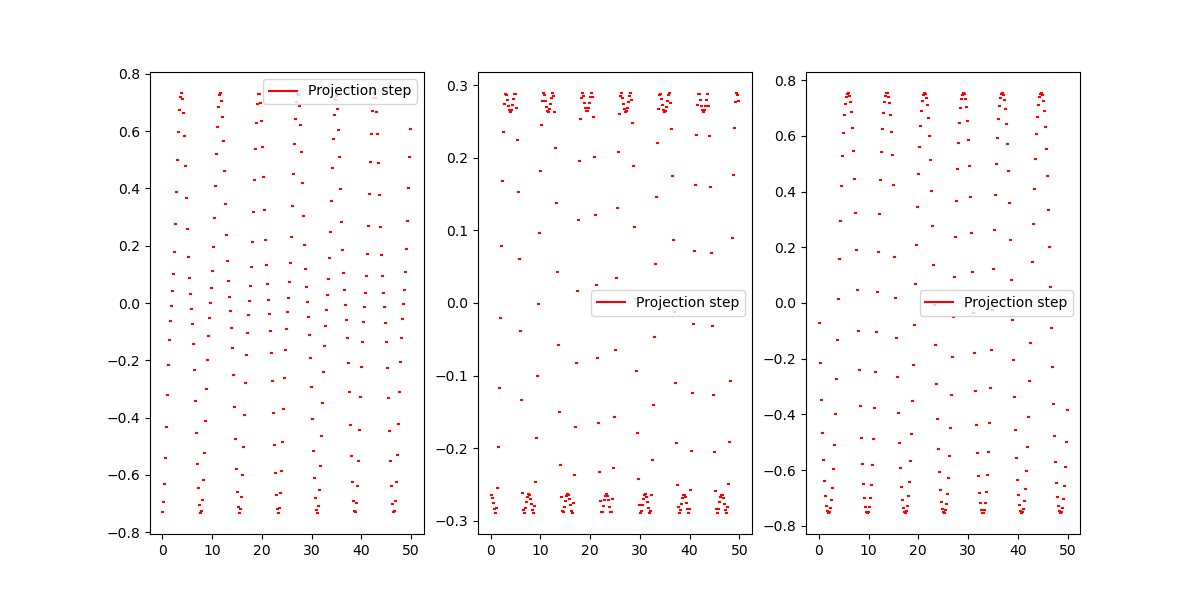

In [52]:
solver.hp.plot_flows_trajectories(rpmsolver, dx_proj)

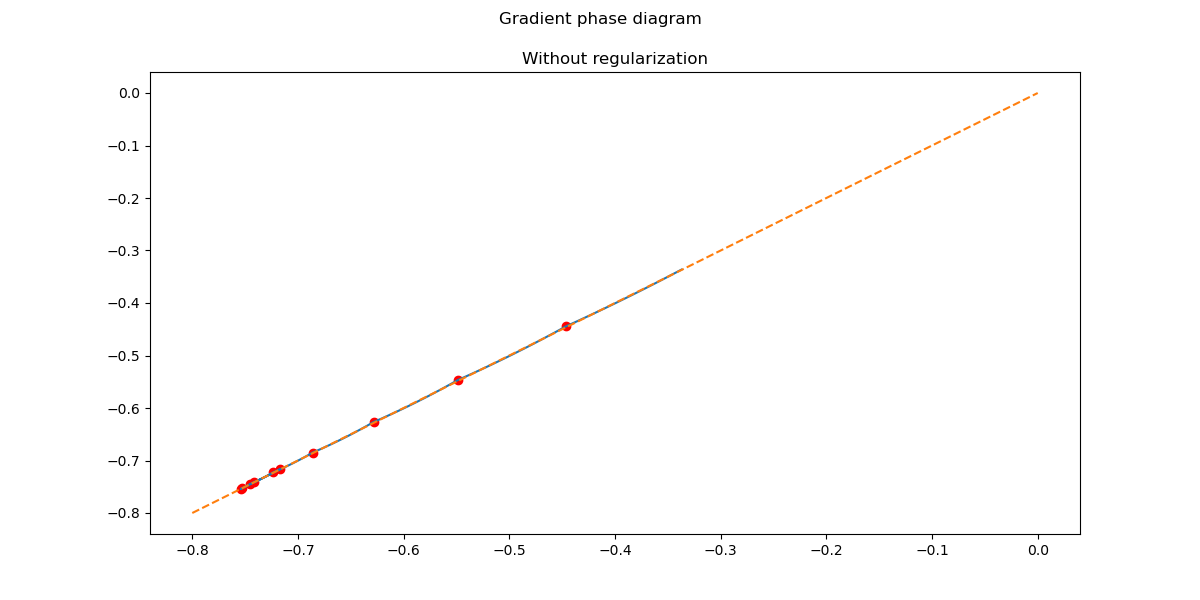

In [53]:
fig = solver.hp.plot_gradients_phase_proj(rpmsolver, xframes[-10:, :], dx_proj[-10:, :], N_points=10)
truc = np.linspace(-0.8, 0, 50)
plt.plot(truc, truc, linestyle = '--')


Dans le cas ou les non-linéarités des composants connéctés sont différentes, la contrainte est réspectée au sens de la projection mais pas en bord de trame. 

In [54]:
# Error on the constraint equation at the sampling points
efforts = model.grad_H(xframes)
error_constraints = (efforts[:, 0] -  efforts [:, 1]) / efforts[:, 0] *100

/tmp/ipykernel_4454/400717996.py:3: RuntimeWarning: invalid value encountered in true_divide
  error_constraints = (efforts[:, 0] -  efforts [:, 1]) / efforts[:, 0] *100


Text(0, 0.5, 'Relative error (%)')

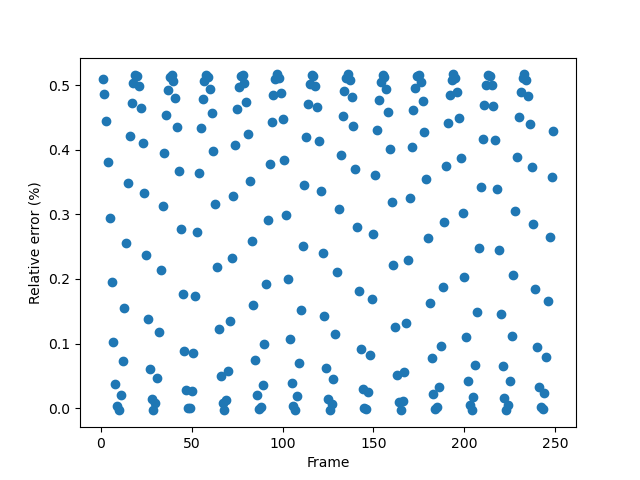

In [55]:
plt.figure()
plt.scatter(np.arange(len(error_constraints)),error_constraints)
plt.xlabel('Frame')
plt.ylabel('Relative error (%)')

### Etude de convergence sur l'erreur de l'équation de contrainte

En premier lieu on s'intérèsse à l'évolution de l'erreur de convergence avec la fréquence d'échantillonage.

In [56]:
# Parameter definition
L0 = 1
phi0 = 0.5
E0 = phi0**2 / L0

L1 = L0
phi1 = 0.3
E1 = E0

C0 = 1

# period
T0 = 2*np.pi*np.sqrt((L0+L1)*C0)
f0 = 1/T0
print(f"T0 = {T0}s")

#Simulation duration 
duration = 5

T0 = 8.885765876316732s


In [57]:
model = models.NonLinearLLC2(L0, E1, phi1, C0)
p_order = 1
k_order = p_order

duration = 50

init = np.array([0, 0, 1])

fstest = [1, 10, 100]

error_constraints = np.array(np.zeros(len(fstest)), dtype=object)
for i, fs in enumerate(fstest):
    rpmsolver = solver.RPMSolverPHS(model, p_order, k_order, 1/fs, max_iter=1000)
    xframes, dx_proj = rpmsolver.simulate(init, duration)[:2]

    # Error on the constraint equation at the sampling points
    efforts = model.grad_H(xframes)
    error_constraints[i] = np.abs((efforts[1:, 0] -  efforts [1:, 1]) / efforts[1:, 0] *100)


Mean number of NR iterations : 22.16
Max number of NR iterations : 53.0,              step index : 47
Mean number of NR iterations : 29.354
Max number of NR iterations : 160.0,              step index : 76
Mean number of NR iterations : 20.5946
Max number of NR iterations : 151.0,              step index : 3


In [58]:
means = [np.mean(error_constraints[i]) for i in range(len(fstest))]
print('Mean values of relative error :')
for i in range(len(means)):
    print(f'fs = {fstest[i]}, error = {means[i]} %')

Mean values of relative error :
fs = 1, error = 12.578773410933636 %
fs = 10, error = 0.06939823897365208 %
fs = 100, error = 0.000695649833981529 %


L'erreur décroit rapidement avec la fréquence d'échantillonage.

Text(0, 0.5, 'Relative error')

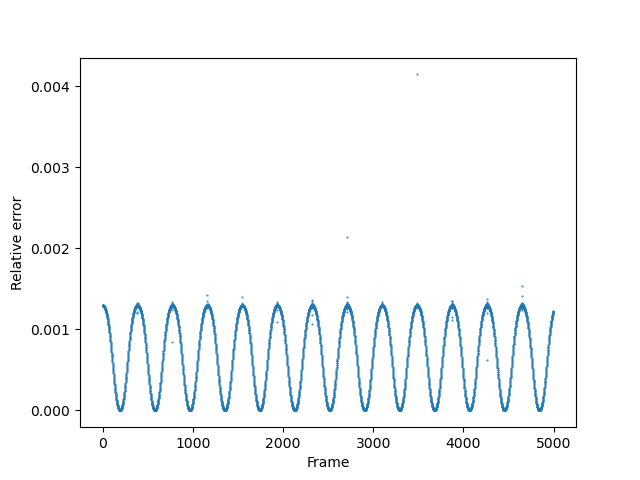

In [59]:
plt.figure()
plt.scatter(np.arange(len(error_constraints[len(fstest)- 1])), error_constraints[len(fstest)- 1], s = 0.2)
plt.xlabel('Frame')
plt.ylabel('Relative error')

L'erreur semble rester bornée au cours de la simulation.

On cherche maintenant à observer la convergence avec l'ordre de projection de RPM.

In [60]:
model = models.NonLinearLLC2(L0, E1, phi1, C0)
p_orders = [1, 2, 3, 4, 5, 6]
k_order = p_order

duration = 50

init = np.array([0, 0, 1])

fs = 1

error_constraints = np.array(np.zeros(len(p_orders)), dtype=object)
for i, p_order in enumerate(p_orders):
    rpmsolver = solver.RPMSolverPHS(model, p_order, 1, 1/fs, max_iter=1000)
    xframes, dx_proj = rpmsolver.simulate(init, duration)[:2]

    # Error on the constraint equation at the sampling points
    efforts = model.grad_H(xframes)
    error_constraints[i] = np.abs((efforts[1:, 0] -  efforts [1:, 1]) / efforts[1:, 0] *100)

Mean number of NR iterations : 22.16
Max number of NR iterations : 53.0,              step index : 47
Mean number of NR iterations : 43.76
Max number of NR iterations : 130.0,              step index : 2
Mean number of NR iterations : 54.04
Max number of NR iterations : 150.0,              step index : 2
Mean number of NR iterations : 59.78
Max number of NR iterations : 160.0,              step index : 29
Mean number of NR iterations : 62.26
Max number of NR iterations : 163.0,              step index : 29
Mean number of NR iterations : 65.1
Max number of NR iterations : 164.0,              step index : 29


In [61]:
means = [np.mean(error_constraints[i]) for i in range(len(p_orders))]
print('Mean values of relative error :')
for i in range(len(means)):
    print(f'P_order = {p_orders[i]}, error = {means[i]} %')

Mean values of relative error :
P_order = 1, error = 12.578773410933636 %
P_order = 2, error = 1.296437208568486 %
P_order = 3, error = 1.0178717692776766 %
P_order = 4, error = 0.05877086042780115 %
P_order = 5, error = 0.023515675734480105 %
P_order = 6, error = 0.003629176761975838 %


L'erreur diminue avec l'ordre de projection. On remarque également que le nombre moyen d'itérations de Newton-Raphson augmente avec l'ordre de projection (ce qui n'est plus vrai lorsqu'on augmente la fréquence d'échantillonage).

## Nombre d'itération de Newton Raphson en fonction de la fréquence d'échantillonage

In [62]:
model = models.NonLinearLLC2(L0, E1, phi1, C0)
p_orders = [1, 2, 3, 4]
k_order = p_order

duration = 10

init = np.array([0, 0, 1])

fstest = [10, 100, 1000]

iters = np.array(np.zeros((len(p_orders), len(fstest))), dtype=object)
for i, p_order in enumerate(p_orders):
    for j, fs in enumerate(fstest):
        rpmsolver = solver.RPMSolverPHS(model, p_order, k_order, 1/fs, max_iter=1000)
        xframes, dx_proj, w_proj, y_proj, lambda_proj, iterations = rpmsolver.simulate(init, duration)

        iters[i, j]= iterations

Mean number of NR iterations : 29.59
Max number of NR iterations : 160.0,              step index : 76
Mean number of NR iterations : 20.63
Max number of NR iterations : 151.0,              step index : 3
Mean number of NR iterations : 11.8185
Max number of NR iterations : 131.0,              step index : 7629
Mean number of NR iterations : 30.2
Max number of NR iterations : 163.0,              step index : 37
Mean number of NR iterations : 20.638
Max number of NR iterations : 151.0,              step index : 4
Mean number of NR iterations : 11.7466
Max number of NR iterations : 131.0,              step index : 64
Mean number of NR iterations : 30.24
Max number of NR iterations : 163.0,              step index : 37
Mean number of NR iterations : 20.639
Max number of NR iterations : 151.0,              step index : 4
Mean number of NR iterations : 11.9165
Max number of NR iterations : 131.0,              step index : 3802
Mean number of NR iterations : 30.24
Max number of NR iterations 

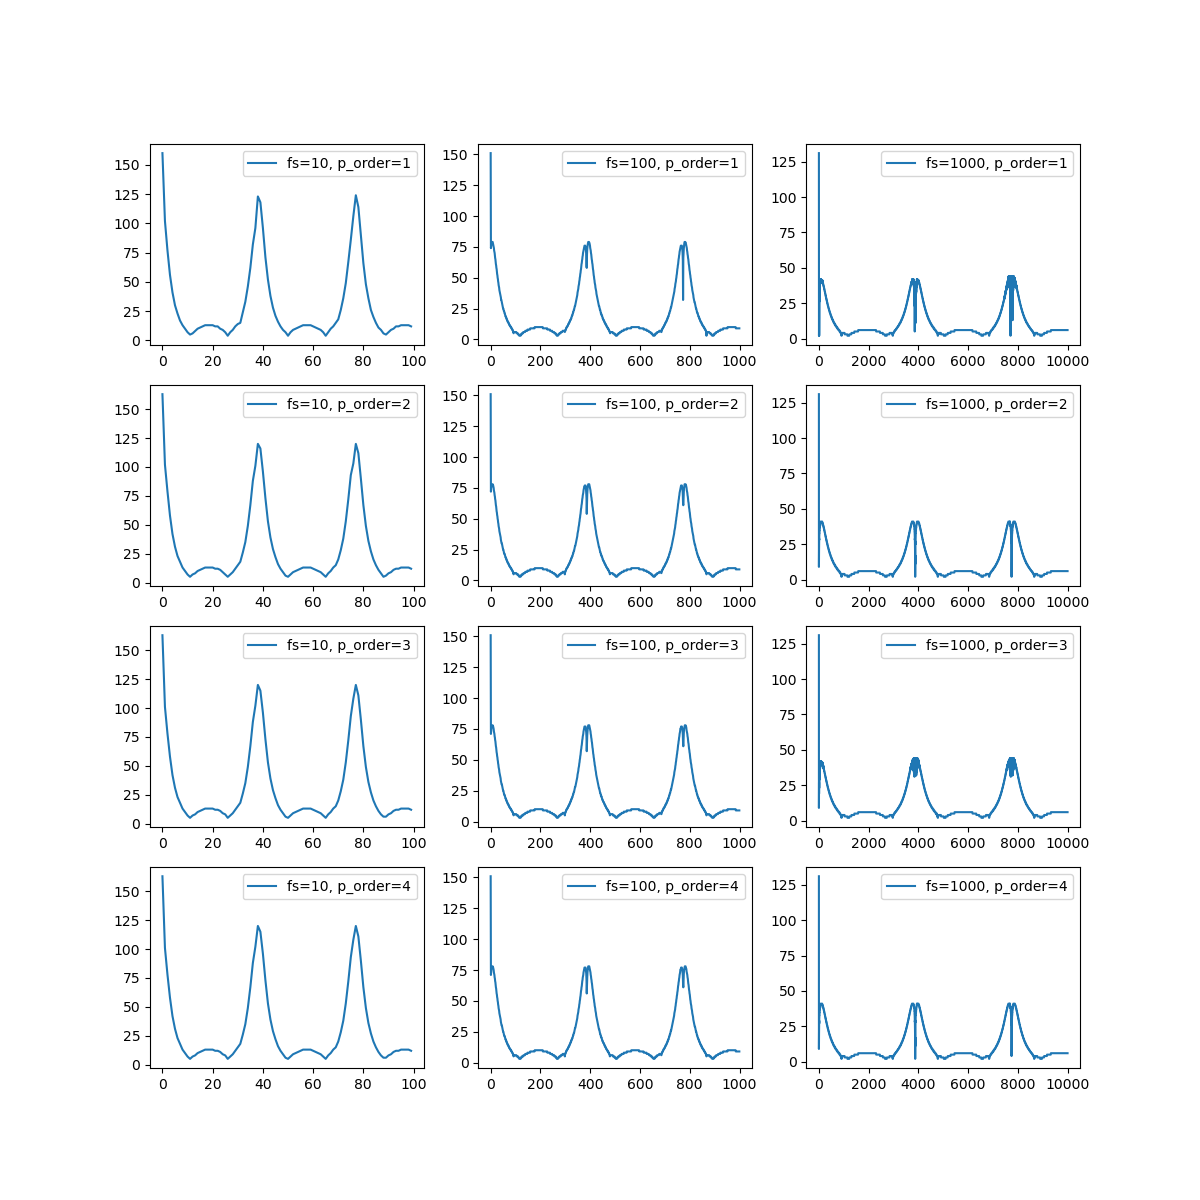

In [65]:
fig, ax = plt.subplots(nrows=len(p_orders), ncols=len(fstest), figsize = (12, 12))

for i, p_order in enumerate(p_orders):
    for j, fs in enumerate(fstest):
        ax[i, j].plot(iters[i,j], label=f'fs={fs}, p_order={p_order}')
        ax[i, j].legend()